<h1> Calculating R*</h1>

The principle of competitive exclusion is a cornerstone of species interaction theory. Hardin's modern formulation states that if:
 
* two noninterbreeding populations occupy the same ecological niche
* are sympatric (occupy the same geographic territory)
* and, population A is fitter than population B

then A will eventually displace B, which will become extinct.

However, numerous natural communities (particularly those with high productivity) display coexistence of diverse species. How? Niche partitioning - species specialize by finely distinguishing between available resources, adapting to their specific uses, and partitioning accordingly. It follows that competitive exclusion should prevail in highly homogeneous environments, resulting in low diversity. Hutchinson noted that the ocean seems to be a highly homogeneous environment with few discernible gradients (mainly related to light and depth), yet high diversity. He called this the paradox of the plankton.

<h3> Examining coexistence </h3>

Assume that resource limitation leads to a decrease in reproduction while mortality remains constant. Therefore, as the concentration of the limiting resource decreases, so too does growth rate. In this case, the relationship between growth rate and resource concentration can be described using the Monod equation:

$ \mu(R) = \mu_{max} \frac{R}{R + k_R} $

where $\mu_{max}$ is the intrinsic rate of of increase (maximum population growth rate), $k_R$ is a the “half saturation constant”, and R is the concentration of resource available. Since loss rate (mortality) $L$ is independent of resource concentration, this gives us an equation for growth rate of, e.g. heterotrophic bacteria population $B$ expressed exclusively in terms of the resource concentration: 

$$ \frac{dB}{dt} = \mu B - LB  = \mu_{max} \frac{R}{R+k_R} - LB $$


<h3> Resource Competition Theory </h3>

A population is at equilibrium when the per capita population growth rate is 0. This occurs when the (resource dependent) growth rate is equal to the loss rate, e.g. when $\mu = L$. 

<b>$R*$ is then defined at the point where $\mu = L$ </b>

When two species compete for a shared limited resource, the conditions favor the species that can continue to sequester and utilize resources effectively.

$ \frac{dB}{dt} = \mu B - LB $

For a system where we incorporate linear loss rates ($m_l$ cell maintenance, senesence, etc), quadratic loss rates ($m_q$ mortality from e.g. viral lysis) and grazing by zooplankton $Z$ we can write:

$ \frac{dB}{dt} = \mu B - m_l B - m_q B^2 - g*B*Z $ and,

$ L = m_l + m_q B + gZ $

where g, the zooplankton grazing rate, is a function of B that follows a similar form to that of the growth rate of B:

$ g(B) = g_{max} \frac{B}{B + k_g} $

<h2> Calculating R* </h2>

<b>Species R* represents the minimum amount of a specific resource required for a species to survive or maintain its population.</b> 

<b>Resource R* represents the level of a specific resource at which it is fully utilized by all competing species, and its availability limits the growth of those species.</b>

$R*$ is found at equlibrium, where $\mu = L$, so we can obtain the R* (in this case $D_i^*$ for detritus pool $D_i$) by setting $\mu = L$ and solving for D:

$$ \mu_{max} \frac{D}{D + k_d} = L $$

$$ \mu_{max} D = L(D + k_d) = LD + Lk_d $$

$$ \mu_{max} D - LD = Lk_d $$

$$ D(\mu_{max} - L) = Lk_d $$

$$ D^* = \frac{Lk_d}{\mu_{max} - L} $$

Note that in the case of bacteria in the model, $\mu_{max} = y_b * V_{max}$

We can then substitute loss rate $L$ with the relevant expression within the model, which, in the case of heterotrophic bacteria $B_i$:

$$ L = m_l + m_q B + g_bZ $$ 

$$ g_b = g_{max} \frac{B}{B + k_g} $$

$$ D_i^* = \frac{L_{B}k_d}{\mu_{max} - L_{B}} $$

In our case it's R*_ij for each species i that consumes a given resource j. 

In [1]:
using NCDatasets
using Plots, ColorSchemes
using DataFrames
using SparseArrays, LinearAlgebra

function get_size(arr)

    out = Vector{Int}()
    
    for a in arr
        append!(out, size(a, 2))
    end

    return out

end


function get_endpoints(ds, vars)

    out = Vector{Any}()

    for v in vars
        append!(out, [ds["$v"][:,:,end]])
    end

    return out[1], out[2], out[3], out[4], out[5]

end

function get_nonzero_axes(M)

    Cs = sparse(M)
    (II, JJ, _) = findnz(Cs) 
    
    return II, JJ

end 

get_nonzero_axes (generic function with 1 method)

In [ ]:
winter = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/out_100y_20230814_2111.nc")
summer = NCDataset("/home/lee/Dropbox/Development/NPZBD_1D/results/outfiles/out_100y_20230814_2153.nc")

In [ ]:
final_5_years_b4 = winter["b"][:,4,end-36600:end]
final_year_b4 = winter["b"][:,4,end-7320:end]

In [ ]:
b4_surf = final_5_years_b4[1, :]
b4_300m = final_5_years_b4[30, :]
b4_400m = final_5_years_b4[40, :]
b4_500m = final_5_years_b4[50, :]
b4_600m = final_5_years_b4[60, :]
b4_800m = final_5_years_b4[80, :]

In [15]:
function pct_change(state_var::AbstractVector{<:Number})
    [i == 1 ? missing : (state_var[i]-state_var[i-1])/state_var[i-1] for i in eachindex(state_var)]
end

pct_change (generic function with 1 method)

In [19]:
b4_change_surf = pct_change(b4_surf)
b4_change_mid = pct_change(b4_400m)
b4_change_600 = pct_change(b4_600m)
b4_change_btm = pct_change(b4_800m)

36601-element Vector{Union{Missing, Float64}}:
   missing
 -1.4440939019551682e-11
 -1.4440713593186598e-11
 -1.4440262740247874e-11
 -1.4439924600595946e-11
 -1.4439699174230821e-11
 -1.4439135608005229e-11
 -1.4438910181640075e-11
 -1.443857204198809e-11
 -1.4438008475762441e-11
  ⋮
 -1.1414479766655117e-11
 -1.1414254340108863e-11
 -1.1413916200224329e-11
 -1.1413916200354607e-11
 -1.1413916200484884e-11
 -1.1413465347262054e-11
 -1.1413352634054043e-11
 -1.1413352634184307e-11
 -1.1413127207638011e-11

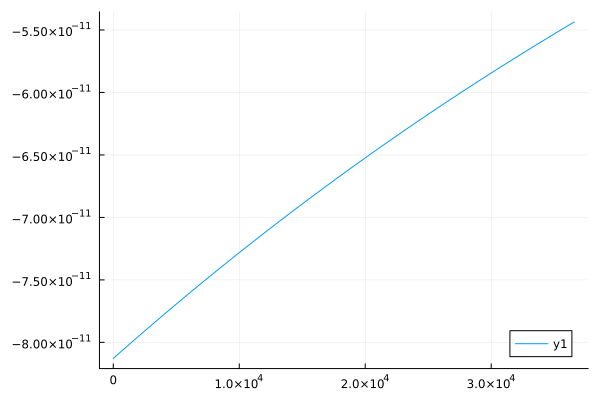

In [13]:
plot(b4_change_surf)

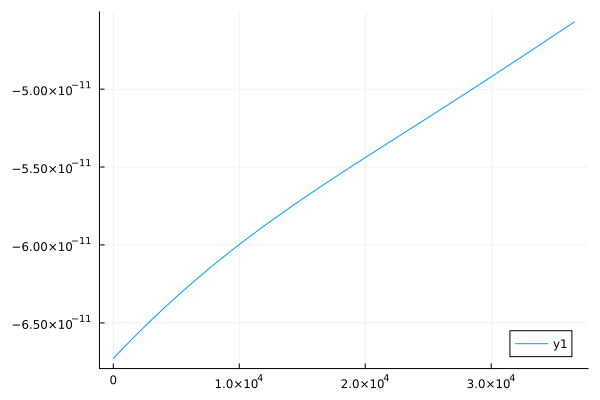

In [17]:
plot(b4_change_mid)

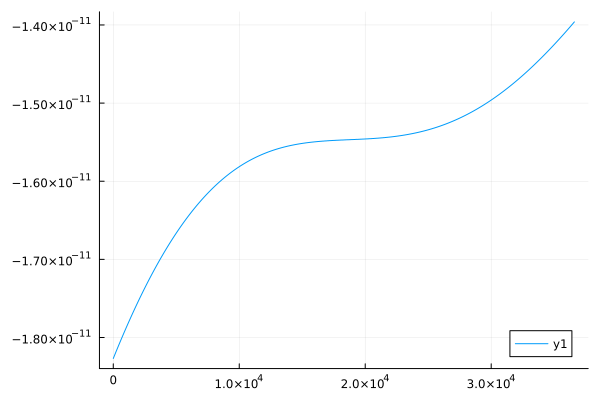

In [20]:
plot(b4_change_600)

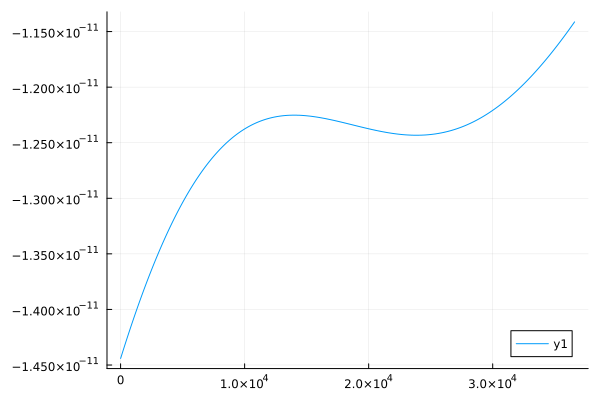

In [14]:
plot(b4_change_btm)

In [3]:
H = 890                         # depth at SPOT (m)
dz = 10                         # height per box
ngrid = Int(H/dz)               # number of boxes
zc = [dz/2 : dz : H - dz/2;]    # centered depth 
zf = [0 : dz : H;]              # face depth; 1 longer than zc

90-element Vector{Int64}:
   0
  10
  20
  30
  40
  50
  60
  70
  80
  90
   ⋮
 810
 820
 830
 840
 850
 860
 870
 880
 890

In [4]:
wtemp = 6.5 .*exp.(-zc ./ 150) .+ 9 .*exp.(-zc ./ 500) .+ 3
stemp = 10 .*exp.(-zc ./ 150) .+ 9 .*exp.(-zc ./ 500) .+ 2.9

temp_coeff_arr = 0.8
temp_ae_arr = -4000
temp_ref_arr = 293.15   
t_kel = 273.15
wtemp_fun = temp_coeff_arr .* exp.(temp_ae_arr .*(1 ./ (wtemp .+ t_kel) .- 1 ./ temp_ref_arr))
stemp_fun = temp_coeff_arr .* exp.(temp_ae_arr .*(1 ./ (stemp .+ t_kel) .- 1 ./ temp_ref_arr))

89-element Vector{Float64}:
 0.8568592473849743
 0.8257565949073218
 0.7972441588601349
 0.7710566164010859
 0.7469603670826943
 0.7247492388214929
 0.7042408362109418
 0.6852734269717276
 0.6677032804167425
 0.651402386568475
 ⋮
 0.378271862704862
 0.3775155600309572
 0.3767781252647469
 0.376058951405665
 0.3753574582329656
 0.37467309079766764
 0.3740053180120324
 0.37335363132971056
 0.372717543510278

In [5]:
nw, pw, zw, bw, dw = get_endpoints(winter, ["n", "p", "z", "b", "d"])
ns, ps, zs, bs, ds = get_endpoints(summer, ["n", "p", "z", "b", "d"])

([4.919326680659662; 4.9212366431714925; … ; 15.789072285098554; 15.789125922771227;;], [4.99582250645336e-305 2.8833190012788094e-305 … 1.4119174189133251e-304 9.324521367291924e-305; 4.984950204839437e-305 2.8809138372543433e-305 … 1.4066239727332235e-304 9.294276207862108e-305; … ; 2.224878904808939e-305 2.223460586990549e-305 … 2.2251148446693887e-305 2.2235839840015375e-305; 2.2239839639691736e-305 2.2247247479370323e-305 … 2.2243059191308757e-305 2.2245554180609885e-305], [0.028173681140561235 0.013482027063113529 0.0061621059955306685 0.017695472182958208; 0.02813910448171665 0.013474068527953829 0.006158478501002248 0.017684134122557052; … ; 1.3499115993249896e-9 1.255806022117485e-8 8.414162902244597e-10 3.771014445037635e-9; 1.3482068486292348e-9 1.2545900124246197e-8 8.403549434574716e-10 3.766605157395465e-9], [0.005396649912133292 4.780510761893793e-30 … 0.04319593123334129 0.019454553839706366; 0.005398300910310816 4.777328664234758e-30 … 0.043153672625155605 0.0194298228


0 = dB/dt = umax(R/(R + K_R)) * B - LB --> R* = K_r * L / umax - L

In [18]:
II, JJ = get_nonzero_axes(winter["CM"][:])
winter["vmax_ij"][:]


6×11 Matrix{Float64}:
  0.293429  Inf        Inf        Inf        …  Inf       Inf       Inf
 Inf         0.153813   0.265394  Inf           Inf       Inf       Inf
 Inf        Inf        Inf         0.261691     Inf       Inf       Inf
 Inf        Inf        Inf        Inf           Inf       Inf       Inf
 Inf        Inf        Inf        Inf            4.20288  Inf       Inf
 Inf        Inf        Inf        Inf        …  Inf        2.67304   0.734479

In [27]:
function get_B_uptake(SV, ds, temp_fun, M, growth, K)

    II, JJ = get_nonzero_axes(winter[M][:])
    uptake = []

    for j = axes(II, 1)
        max_growth = ds[growth][:]
        half_sat = ds[K][:]
        uptake = SV[:,JJ[j]] .* temp_fun .* max_growth[II[j],JJ[j]] .* SV[:,II[j]] ./ (SV[:,II[j]] .+ half_sat[II[j],JJ[j]] )
        uptake += uptakej
    end

    return uptake

end

get_B_uptake (generic function with 1 method)

In [28]:
wuptake = get_uptake(bw, winter, wtemp_fun, "CM", "vmax_ij", "Km_ij")

DimensionMismatch: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(0),), b has dims (Base.OneTo(89),), mismatch at 1